## Group Sentiment Analysis

This portion of our analysis involved averaging the Compound Score from the VADER analysis for each troll group. We found the average score among the troll categories defined in the original data: Commercial, Fearmonger, HashtagGamer, LeftTroll, NewsFeed, RightTroll, and Unknown. We are particularly interested in the difference between LeftTroll and RightTroll sentiment scores; are LeftTrolls, aimed at sowing division among Democrats, more negative than RightTrolls, who wrote supportive tweets in favor of Trump, in addition to bashing liberal causes? Is there much difference between sentiments among all of the groups?

The analysis begins by importing the dependent libraries and reading in the full dataset of English-language tweets (about 2.1 million records).

In [20]:
# Allows plots to be visible and stored within this notebook.
%matplotlib inline

In [21]:
# Import the dependent libraries, namely PANDAs, Matplotlib, and NumPy.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
# Read in the CSV file of the full dataset as a dataframe and preview the dataframe.
csv_path = "/Users/timst.onge/Russian-Troll-Tweets-Sentiment-Analysis/all_data.csv"
df = pd.read_csv(csv_path, low_memory=False)

df.head(20)

,tweet_id,Compound_Score,Positive_Score,Negative_Score,Neutral_Score,external_author_id,author,content,region,language,...,account_type,retweet,account_category,new_june_2018,alt_external_id,article_url,tco1_step1,tco2_step1,tco3_step1,new_publish_date
0,914580356430536707,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,...,Right,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN,2017-10-01 19:58:00
1,914621840496189440,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,...,Right,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN,2017-10-01 22:43:00
2,914623490375979008,-0.1531,0.126,0.198,0.676,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,...,Right,1,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN,2017-10-01 22:50:00
3,914639143690555392,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,...,Right,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN,2017-10-01 23:52:00
4,914312219952861184,0.6399,0.413,0.000,0.587,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,...,Right,1,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN,2017-10-01 02:13:00
5,914320835325853696,0.4926,0.242,0.000,0.758,906000000000000000,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th...",Unknown,English,...,Right,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/FoxNews/status/91423949678...,NaN,NaN,2017-10-01 02:47:00
6,914321156466933760,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,🐝🐝🐝 https://t.co/MorL3AQW0z,Unknown,English,...,Right,1,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,https://twitter.com/Cernovich/status/914314644...,NaN,NaN,2017-10-01 02:48:00
7,914322215537119234,-0.0191,0.000,0.054,0.946,906000000000000000,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,Unknown,English,...,Right,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,NaN,NaN,NaN,2017-10-01 02:52:00
8,914335818503933957,0.2263,0.205,0.136,0.659,906000000000000000,10_GOP,"As much as I hate promoting CNN article, here ...",Unknown,English,...,Right,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,http://www.cnn.com/2017/09/27/us/puerto-rico-a...,NaN,NaN,2017-10-01 03:47:00
9,914336862730375170,0.0000,0.000,0.000,1.000,906000000000000000,10_GOP,After the 'genocide' remark from San Juan Mayo...,Unknown,English,...,Right,0,RightTroll,0,905874659358453760,http://twitter.com/905874659358453760/statuses...,NaN,NaN,NaN,2017-10-01 03:51:00


With the data brought in as a dataframe, the next step involves grouping the calculations on the data by the "account_category" field, which holds the data for the type of "troll group" defined in the data.

In [23]:
# Group the dataframe by the "account_category" and then calculate the average compound score of tweets 
# among each group.
avg_compound_category = df.groupby(["account_category"]).mean()["Compound_Score"]
avg_compound_category.head(10)

account_category
Commercial      0.049526
Fearmonger     -0.019168
HashtagGamer    0.027669
LeftTroll       0.026641
NewsFeed       -0.117262
RightTroll     -0.050007
Unknown         0.039943
Name: Compound_Score, dtype: float64

The resulting average Compound Score by each category does not reveal dramatic results. Noting again that the Compound Score is a range between +1 (extremely positive) and -1 (extremely negative), the average scores among all of the groups closely hover around 0 (neutral). This may not indicate the veracity of the accounts by themselves (e.g. extreme tweets of +1 and -1 will average to 0), but the results indicate that there are no clear differences across the dataset of categories using more positive or negative language than others.

Still, we decided to graph this data to get a more visual understanding of the results.

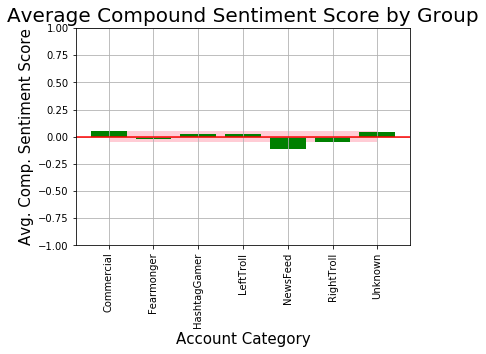

In [24]:
# Define the y and x axes of the bar graph we will create.

# The average compound category (transformed into a list) is the y-axis.
avg_com_cat_list = avg_compound_category.values.tolist()
# Define the x-axis as the length of the account categories (7)
x_axis = np.arange(len(avg_com_cat_list))

# Define the bar graph settings, including title, axis labels, and x-tick labels.
plt.xticks(x_axis, ["Commercial", "Fearmonger", "HashtagGamer", "LeftTroll", "NewsFeed", "RightTroll", "Unknown"])
plt.title("Average Compound Sentiment Score by Group", fontsize=20)
plt.xlabel("Account Category", fontsize=15)
plt.ylabel("Avg. Comp. Sentiment Score", fontsize=15)

# Plot the data as average sentiment by group
plt.bar(x_axis, avg_com_cat_list, color='g', alpha=1, align="center")

# Color in the zone between -.05 and .05, which indicates a neutral sentiment, as defined in VADER documentation.
plt.fill_between(x_axis, -.05, .05, facecolor='pink', alpha=0.8)

# Set the graph limits at +1 (most positive) and -1 (most negative).
plt.ylim(-1, 1)

# Add a horizontal line at y=0, rotate the tick labels to be vertical (and therefore legible), and add a grid.
plt.axhline(color="red")
plt.xticks(rotation=90)
plt.grid()

# Save the figure as a PNG file and then show the final graph.
plt.savefig("/Users/timst.onge/Russian-Troll-Tweets-Sentiment-Analysis/avg_compound_by_group.png")
plt.show()

As expected, visualizing the average compound sentiment score by group in a bar graph demonstrates how the sentiments were grouped towards 0. We shaded in a portion of the graph between -.05 and .05, which represents the "neutral zone" in which tweets are essentially classified as neutral, as defined by the VADER documentation. To get a closer look at the small differences between each group, another bar graph is created below with the y-axis set only between .2 and -.2. 

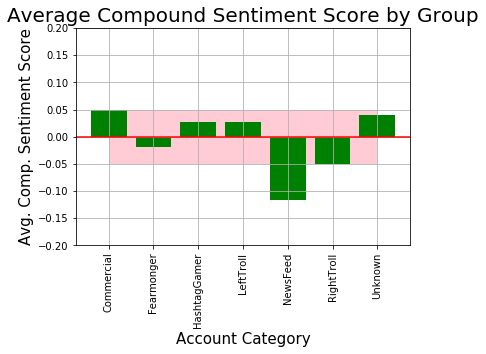

In [25]:
# Set-up a bar graph identical to the first graph, except change the visible y-axis to between .2 and -.2.
plt.xticks(x_axis, ["Commercial", "Fearmonger", "HashtagGamer", "LeftTroll", "NewsFeed", "RightTroll", "Unknown"])
plt.title("Average Compound Sentiment Score by Group", fontsize=20)
plt.xlabel("Account Category", fontsize=15)
plt.ylabel("Avg. Comp. Sentiment Score", fontsize=15)
plt.bar(x_axis, avg_com_cat_list, color='g', alpha=1, align="center")
plt.fill_between(x_axis, -.05, .05, facecolor='pink', alpha=0.8)
plt.ylim(-.2, .2)
plt.axhline(color="red")
plt.xticks(rotation=90)
plt.grid()

# Save the figure as a PNG file and then show the final graph.
plt.savefig("/Users/timst.onge/Russian-Troll-Tweets-Sentiment-Analysis/avg_compound_by_group2.png")
plt.show()

Taking a closer look at the data, we see that "NewsFeed" tweets ended up with a more negative average sentiment, while "Commercial tweets averaged to be more positive. Perhaps because the news seems to skew generally more negative, especially political news, this result demonstrates that negativity? And since Commercial tweets are the most positive, perhaps this indicates advertizing's natural push to coax potential customers with positivity? Ultimately, we can't look too deep into the differences between each category type, because ultimately they are not much different in their average sentiment score. It seems all account categories tweeted positively and negatively in large measure, with averages ending up in the neutral middle.